Note: Terms Used in the Code
1. X= training data before encoding
2. train_X= after encoding and nlp pre-processing
3. X_train,X_test= after train,val split of train_X
4. test=Given test data
5. test_X= encoded test data
6. y=independent feature
7. y_train=training data of independent feature
8. y_test= val data of independent feature
9. pred/predictions= predicted value using the model


### **Importing Necessary Libraries**

In [104]:
import pandas as pd   #pandas for dataframes
import numpy as np    #numpy for arrays
import matplotlib.pyplot as plt  #matplotlib for visualising the feature relations
import seaborn as sns     #seaborn for visualisations like correlation
import nltk               #nlp library for text pre-processing

## **Importing the given Train and Test data**

In [105]:
train=pd.read_csv("/content/drive/MyDrive/dataset/train.csv") #train data
test=pd.read_csv('/content/drive/MyDrive/dataset/test.csv')  #test data

## Train data

In [106]:
train.head()    #top 5 entries of train data

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [107]:
train.isnull().sum()  #checking if null values are present in the train data

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

*No Null values present in the train data*

In [108]:
train.shape  #dimensions of train data

(32165, 8)

In [109]:
train.info()   #Information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [110]:
train.describe()  #stats of train data

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


## Test data

In [111]:
test.head() #top 5 entries of the test data

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [112]:
test.isnull().sum() #checking null values in the test data

patient_id                    0
name_of_drug                  0
review_by_patient             0
drug_approved_by_UIC          0
number_of_times_prescribed    0
use_case_for_drug             0
effectiveness_rating          0
dtype: int64

No Null values in the test data

In [113]:
test.shape #dimensions of test data

(10760, 7)

In [114]:
test.info() #details of test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   patient_id                  10760 non-null  int64 
 1   name_of_drug                10760 non-null  object
 2   review_by_patient           10760 non-null  object
 3   drug_approved_by_UIC        10760 non-null  object
 4   number_of_times_prescribed  10760 non-null  int64 
 5   use_case_for_drug           10760 non-null  object
 6   effectiveness_rating        10760 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 588.6+ KB


## Dependent and Independent Variables

In [115]:
#splitting dependent and Independent features
X = train.iloc[:,:-1] #independent variables
y = train.iloc[:,-1]  #dependent variables-base_score

In [116]:
X  

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
...,...,...,...,...,...,...,...
32160,183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89
32161,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0
32162,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25
32163,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22


In [117]:
X.dtypes #datatypes

patient_id                     int64
name_of_drug                  object
use_case_for_drug             object
review_by_patient             object
effectiveness_rating           int64
drug_approved_by_UIC          object
number_of_times_prescribed     int64
dtype: object

In [118]:
X.shape #dimension of the dependent features

(32165, 7)

In [119]:
y #independent features

0        8.022969
1        7.858458
2        6.341969
3        6.590176
4        6.144782
           ...   
32160    6.963020
32161    0.899076
32162    6.241812
32163    7.940428
32164    8.205393
Name: base_score, Length: 32165, dtype: float64

In [120]:
y.dtypes #datatypes

dtype('float64')

## Text Pre-processing

In [121]:
!pip install nltk  #natural langauage tool kit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [123]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [124]:
from nltk.corpus.reader.wordnet import WordNetError
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import sentiwordnet as swn, wordnet
from nltk.stem.porter import PorterStemmer

In [125]:
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))  #to remove unnecessary words
#punctuation = list(string.punctuation)
#stop.update(punctuation)

def get_simple_pos(tag): #for parts of speech,in sentiment analysis
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
def lemmatize_words(review_by_patient):
    final_text = []
    for i in review_by_patient.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
X.review_by_patient = X.review_by_patient.apply(lemmatize_words)  #lemmatizing the text


In [127]:
X.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed
0,206461,Valsartan,Left Ventricular Dysfunction,"""it side effect, take combination bystolic 5 m...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""my son halfway fourth week intuniv. become co...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""i use take another oral contraceptive, 21 pil...",5,14-Dec-09,17
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""suboxone completely turn life around. feel he...",9,27-Nov-16,37
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day 5mg start work rock hard erection how...",2,28-Nov-15,43


In [128]:
test.review_by_patient = test.review_by_patient.apply(lemmatize_words) #lemmatising test data 

In [129]:
test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""i&#039;ve try antidepressant year (citalopram...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""contrave combine drug use alcohol, smoking, o...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 day first 2 weeks. using arm face. put vase...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""ive methadone ten year currently,i try get dr...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""ditto rebound sleepless discontinued. do stra...",13-Jan-15,44,Insomnia,2


## **Encoding**

In [131]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()     #to encode the labels into numerical form

In [132]:
#Encoding 
train_X = X.apply(ll.fit_transform)
test_X= test.apply(ll.fit_transform)
train_X.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed
0,28649,2072,335,21317,8,1474,27
1,13333,923,39,23431,7,2213,192
2,13000,1212,110,17272,4,606,17
3,5042,332,412,25587,8,2305,37
4,21683,436,105,183,1,2420,43


## Correlation between features

In [133]:
train_X.corr() #correlation between features

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed
patient_id,1.000000,-0.016277,-0.016597,-0.015709,0.018898,-0.003920,0.018094
name_of_drug,-0.016277,1.000000,0.081260,0.036633,0.005041,0.003559,0.022701
use_case_for_drug,-0.016597,0.081260,1.000000,0.005970,0.053078,0.004434,0.099391
review_by_patient,-0.015709,0.036633,0.005970,1.000000,-0.024438,0.004913,-0.009353
effectiveness_rating,0.018898,0.005041,0.053078,-0.024438,1.000000,0.000016,0.251139
drug_approved_by_UIC,-0.003920,0.003559,0.004434,0.004913,0.000016,1.000000,-0.001661
number_of_times_prescribed,0.018094,0.022701,0.099391,-0.009353,0.251139,-0.001661,1.000000


In [134]:
train_X.shape

(32165, 7)

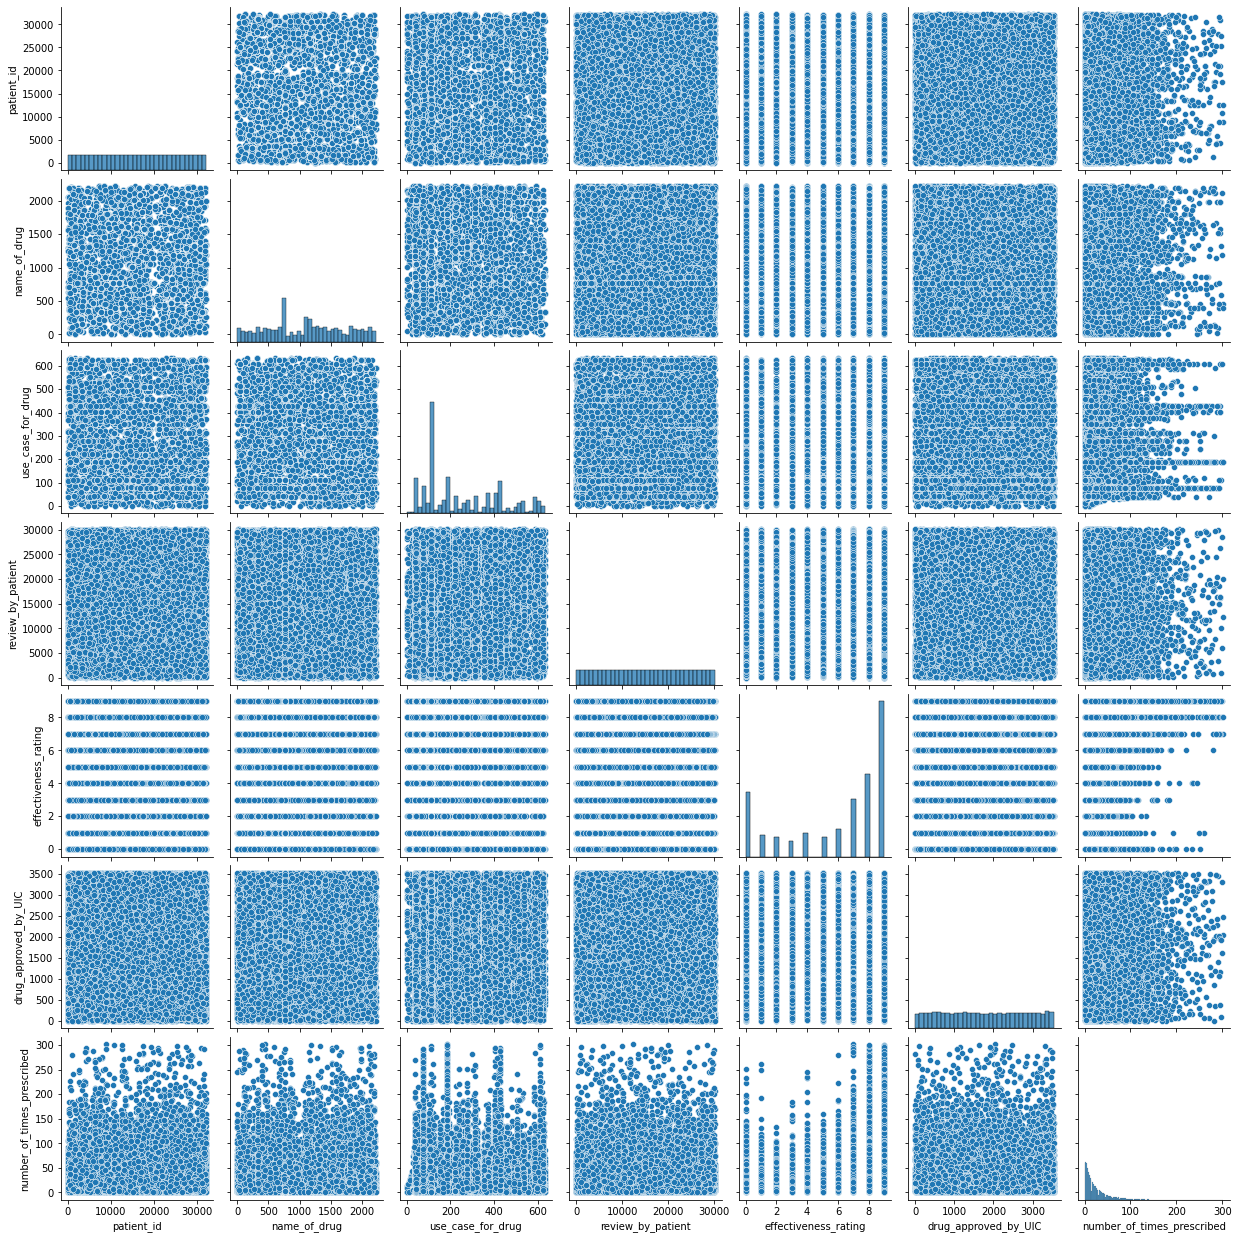

In [135]:
sns.pairplot(train_X)

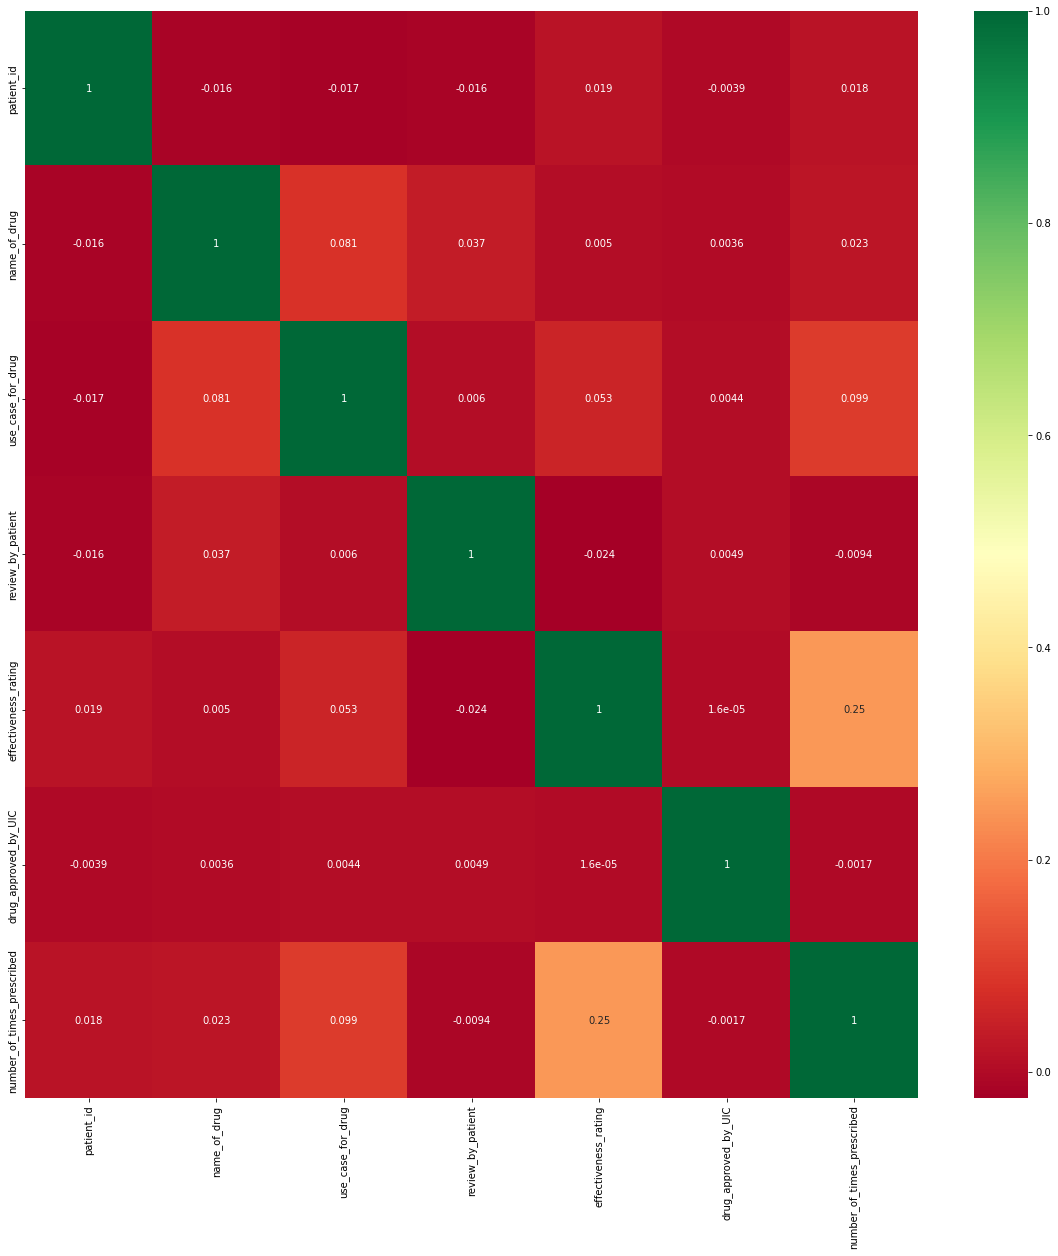

In [136]:
corrmat=train_X.corr()                       #pearson correaltion
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(train_X[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g

In [137]:
test_X.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,7573,854,7143,2058,22,130,9
1,1821,311,827,2640,35,441,8
2,9665,1471,81,2274,13,241,3
3,1051,821,7622,998,21,299,6
4,4427,66,918,442,44,231,1


## Train Test Split

In [138]:
#splitting into train and validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X,y,test_size=0.33452510492) #test data dimension to match the given test data dimensions

In [139]:
X_train.shape

(21405, 7)

In [140]:
X_test.shape

(10760, 7)

In [169]:
test.shape

(10760, 7)

## **Building Model**


1. Using XgBoost Regressor


In [141]:
import xgboost as xg   
xgb_r = xg.XGBRegressor()

In [142]:
xgb_r.fit(X_train, y_train)

[07:22:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [143]:
#reindexing the columns of given test data to match the train data
test_X=test_X[['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient', 'effectiveness_rating', 'drug_approved_by_UIC', 'number_of_times_prescribed']]

In [144]:
#prediction using xgboost
pred = xgb_r.predict(test_X)

In [145]:
output = pred.round(2)
df_output = pd.DataFrame()
temp = pd.read_csv(r'/content/drive/MyDrive/dataset/test.csv')
df_output['patient_id'] = temp['patient_id']
df_output['base_score'] = output


In [146]:
print(df_output)

       patient_id  base_score
0          163740        8.39
1           39293        8.39
2          208087        5.87
3           23295        5.63
4           97013        6.60
...           ...         ...
10755      151266        6.12
10756      139347        4.10
10757      159999        7.19
10758      130945        5.30
10759      113712        7.84

[10760 rows x 2 columns]


In [164]:
df_output.to_csv('Xgboost.csv', index=False)

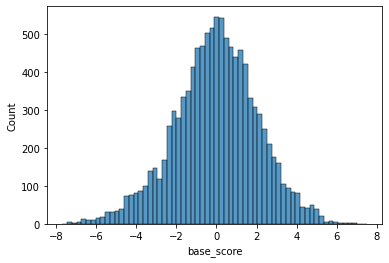

In [148]:
sns.histplot(y_test-pred) # to check if the plot is near to the guassian distribution

In [149]:
from sklearn import metrics
#performance metrics for regression problem
print('MAE:', metrics.mean_absolute_error(y_test, pred))  

MAE: 1.6317549362824828


*******************************************************************************************************************************************************

2. Using Random Regressor

Hyperparmeters tuning for Random Forest Regressor

In [150]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200,num=12)] 
max_features=['auto','sqrt'] #no of features to consider at every split
max_depth=[int(x) for x in np.linspace(5,30, num=6)] #max number of levels in tree
min_samples_split =[2,5,10,15,100] #min samples require to split
min_samples_leaf=[1,2,5,10] #min samples required at each node

In [151]:
from sklearn.model_selection import RandomizedSearchCV #tofind out the best hyperparameters
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


Model

In [152]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [153]:
#Choosing best hyperparameters using Randomised Search CV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [154]:
 rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  19.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  19.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  26.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  25.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [155]:
rf_random.best_params_  #best hyperparameters

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [156]:
rf_random.best_score_  

-0.18712413160465896

In [157]:
predictions=rf_random.predict(test_X) #prediction of test data

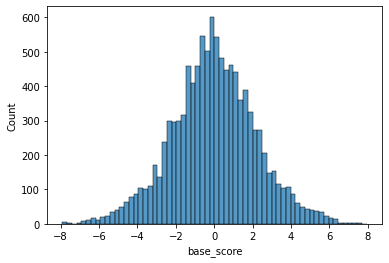

In [158]:
sns.histplot(y_test-predictions) #difference should be minimum, near to guassian distribution

In [162]:
from sklearn import metrics
#performance metrics for regression problem
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 1.7118345170838554


In [165]:
output1 = predictions.round(2)
df_output1 = pd.DataFrame()
temp = pd.read_csv(r'/content/drive/MyDrive/dataset/test.csv')
df_output1['patient_id'] = temp['patient_id']
df_output1['base_score'] = output

In [168]:
df_output1.to_csv('RandomForestRegressor.csv', index=False)
print('Saved the submission file')

Saved the submission file


In [161]:
print(df_output1)

       patient_id  base_score
0          163740        8.76
1           39293        8.75
2          208087        5.95
3           23295        6.00
4           97013        6.93
...           ...         ...
10755      151266        6.17
10756      139347        4.03
10757      159999        6.79
10758      130945        5.31
10759      113712        8.19

[10760 rows x 2 columns]
